In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# caricamento dataset
data = pd.read_csv("feature_vectors_syscalls_frequency_5_Cat.csv")
data

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev,Class
0,1,0,0,3,0,14,2,0,3,0,...,0,0,0,0,0,0,0,37,10,1
1,3,0,0,6,0,42,91,0,32,0,...,0,0,0,0,0,0,2,2838,46,1
2,2,0,0,4,0,23,3,0,17,2,...,0,0,0,0,0,0,1,111,20,1
3,1,0,0,4,0,27,9,0,36,0,...,0,0,0,0,0,0,7,987,197,1
4,3,0,0,11,0,18,3,0,16,0,...,0,0,0,0,0,0,1,98,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11593,2,0,0,11,0,61,13,0,66,17,...,0,0,0,0,0,0,10,2764,236,5
11594,6,0,0,10,1,69,50,1,118,15,...,0,0,0,0,1,0,5,4417,295,5
11595,0,0,0,0,0,21,16,0,48,9,...,0,0,0,0,0,0,5,241,67,5
11596,1,0,0,15,0,90,80,0,239,50,...,0,0,0,0,0,0,3,1703,774,5


In [3]:
X = data.iloc[:,:-1] # conteggio delle chiamate a sistema.
y = data['Class'] #5 non sono malware, 1-4 malware
set(y)

{1, 2, 3, 4, 5}

In [4]:
#stardizzazione dei valori
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
names = data.columns
scaled_values = scaler.fit_transform(X)
scaled_values = np.hstack((scaled_values, np.atleast_2d(y).T))
data = pd.DataFrame(scaled_values,columns=names)
X = data.iloc[:,:-1] 
y = data['Class'] 
X

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,updateServiceLocation,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev
0,-0.127069,-0.021671,-0.040369,-0.267939,-0.242232,-0.490236,-0.103279,-0.228122,-0.322551,-0.333593,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.039288,-0.026273,-0.166002,-0.168129,-0.060113
1,-0.122566,-0.021671,-0.040369,0.021064,-0.242232,0.380168,0.229256,-0.228122,-0.190174,-0.333593,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.039288,-0.026273,0.035473,0.287228,-0.058011
2,-0.124818,-0.021671,-0.040369,-0.171605,-0.242232,-0.210463,-0.099543,-0.228122,-0.258645,-0.233840,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.039288,-0.026273,-0.065265,-0.156099,-0.059529
3,-0.127069,-0.021671,-0.040369,-0.171605,-0.242232,-0.086120,-0.077125,-0.228122,-0.171915,-0.333593,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.039288,-0.026273,0.539159,-0.013688,-0.049195
4,-0.122566,-0.021671,-0.040369,0.502737,-0.242232,-0.365892,-0.099543,-0.228122,-0.263210,-0.333593,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.039288,-0.026273,-0.065265,-0.158212,-0.059237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11593,-0.124818,-0.021671,-0.040369,0.502737,-0.242232,0.970798,-0.062179,-0.228122,-0.034973,0.514305,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.039288,-0.026273,0.841371,0.275198,-0.046918
11594,-0.115811,-0.021671,-0.040369,0.406402,0.003970,1.219485,0.076065,-0.126791,0.202394,0.414552,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.033201,-0.026273,0.337684,0.543926,-0.043473
11595,-0.129321,-0.021671,-0.040369,-0.556943,-0.242232,-0.272635,-0.050970,-0.228122,-0.117138,0.115294,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.039288,-0.026273,0.337684,-0.134965,-0.056785
11596,-0.127069,-0.021671,-0.040369,0.888075,-0.242232,1.872288,0.188156,-0.228122,0.754728,2.160225,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.039288,-0.026273,0.136210,0.102712,-0.015507


In [5]:
#conversione classi malware
for i in range(len(y)):
    if y[i] == 5:
        y[i] = 0;
    else:
        y[i] = 1;
set(y) #0 good,1 malware

{0.0, 1.0}

In [6]:
# smote, creazione e bilanciamento dei valori good
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X

,ACCESS_PERSONAL_INFO___,ALTER_PHONE_STATE___,ANTI_DEBUG_____,CREATE_FOLDER_____,CREATE_PROCESS`_____,CREATE_THREAD_____,DEVICE_ACCESS_____,EXECUTE_____,FS_ACCESS____,FS_ACCESS()____,...,updateServiceLocation,utimes,vfork,vibrate,vibratePattern,wait4,watchRotation,windowGainedFocus,write,writev
0,-0.127069,-0.021671,-0.040369,-0.267939,-0.242232,-0.490236,-0.103279,-0.228122,-0.322551,-0.333593,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.039288,-0.026273,-0.166002,-0.168129,-0.060113
1,-0.122566,-0.021671,-0.040369,0.021064,-0.242232,0.380168,0.229256,-0.228122,-0.190174,-0.333593,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.039288,-0.026273,0.035473,0.287228,-0.058011
2,-0.124818,-0.021671,-0.040369,-0.171605,-0.242232,-0.210463,-0.099543,-0.228122,-0.258645,-0.233840,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.039288,-0.026273,-0.065265,-0.156099,-0.059529
3,-0.127069,-0.021671,-0.040369,-0.171605,-0.242232,-0.086120,-0.077125,-0.228122,-0.171915,-0.333593,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.039288,-0.026273,0.539159,-0.013688,-0.049195
4,-0.122566,-0.021671,-0.040369,0.502737,-0.242232,-0.365892,-0.099543,-0.228122,-0.263210,-0.333593,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.039288,-0.026273,-0.065265,-0.158212,-0.059237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19601,-0.115811,-0.021671,-0.040369,1.439179,-0.101690,1.299785,1.150514,-0.170278,2.037645,3.807373,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.035813,-0.026273,0.366230,-0.029510,-0.050246
19602,-0.126599,-0.021671,-0.040369,0.191526,0.055357,0.464515,0.512880,-0.166882,0.840945,0.913316,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.035609,-0.026273,-0.086291,-0.101378,-0.056383
19603,-0.126274,-0.021671,-0.040369,0.525297,0.003970,0.871993,0.058036,-0.126791,0.106500,-0.151702,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.033201,-0.026273,0.077042,0.083619,-0.055044
19604,-0.124818,-0.021671,-0.040369,0.588419,-0.215009,0.396903,0.281205,-0.216918,0.786946,1.628854,...,-0.021671,-0.051592,-0.142281,-0.025837,-0.023497,-0.038615,-0.026273,-0.065265,-0.031911,-0.043244


In [7]:
#test con più classificatori e valutazioni dei classificatori
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for clf in [tree.DecisionTreeClassifier(), 
            svm.LinearSVC(), 
            svm.SVC(decision_function_shape='ovo')
           ]:
    start = time.time()
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    res_time = round(time.time()-start, 2)
    predictions = clf.predict(X_test)
    print(clf, accuracy, res_time , 'seconds')
    print(classification_report(y_test, predictions))

DecisionTreeClassifier() 0.9734157650695517 2.57 seconds
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      3240
         1.0       0.97      0.97      0.97      3230

    accuracy                           0.97      6470
   macro avg       0.97      0.97      0.97      6470
weighted avg       0.97      0.97      0.97      6470



c:\users\mattia mainini\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC() 0.9398763523956724 8.73 seconds
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      3240
         1.0       0.92      0.96      0.94      3230

    accuracy                           0.94      6470
   macro avg       0.94      0.94      0.94      6470
weighted avg       0.94      0.94      0.94      6470

SVC(decision_function_shape='ovo') 0.9094281298299846 64.06 seconds
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.90      3240
         1.0       0.87      0.96      0.91      3230

    accuracy                           0.91      6470
   macro avg       0.91      0.91      0.91      6470
weighted avg       0.91      0.91      0.91      6470



In [8]:
#classificatore randomforest
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9890262751159197


In [9]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3240
         1.0       0.99      0.99      0.99      3230

    accuracy                           0.99      6470
   macro avg       0.99      0.99      0.99      6470
weighted avg       0.99      0.99      0.99      6470



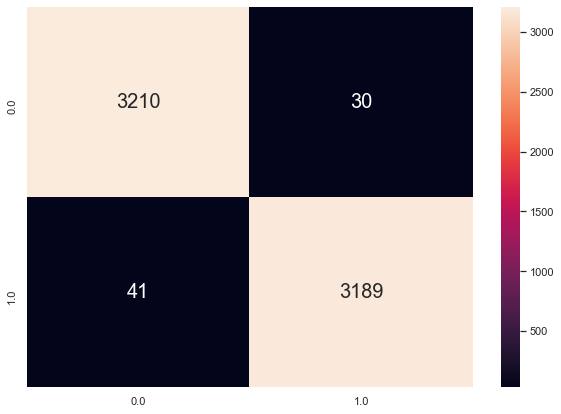

In [10]:
#confusion matrix Randomforest
import seaborn as sn
from sklearn.metrics import confusion_matrix, accuracy_score
labels = set(y)
cm = confusion_matrix(y_test, clf.predict(X_test))
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 20}, 
            xticklabels=labels, yticklabels=labels)# font size
plt.show()

In [11]:
#verifica feature più importanti
KBEST = 16  # uso una variabile per indicare quante features voglio selezionare

from sklearn.feature_selection import SelectKBest, f_classif
select = SelectKBest(f_classif,k=KBEST)
select.fit(X,y)
mask = select.get_support()
np_mask = np.array(mask)
np_columns = np.array(X.columns[:]) # la prima è "label" e non va considerata...
# numpy ci permette la selezione di elementi tramite maschera booleana
# selezioniamo le features più significative...
most_significative_features = np_columns[np_mask] 
# ... e i rispettivi valori di importanza
most_significative_features_importances = clf.feature_importances_[np_mask]

#print(most_significative_features)
#print(most_significative_features_importances)

# accoppiamo i feature con le relative importanze
# e le stampiamo
importance_per_feature = zip(most_significative_features, most_significative_features_importances)
importance_per_feature = sorted(list(importance_per_feature), key = lambda x: -x[1])
for i in importance_per_feature:
    print(i)

('getReceiverInfo', 0.023196050661698952)
('getActivityInfo', 0.01506514210805286)
('remove', 0.012868478078610144)
('FS_ACCESS()____', 0.010185970297113772)
('unlink', 0.008138191278989591)
('brk', 0.007917658710398356)
('FS_ACCESS(CREATE__WRITE)__', 0.0061705985490425885)
('ftruncate64', 0.005832028048903831)
('sigprocmask', 0.005078027861220067)
('FS_ACCESS(CREATE__READ__WRITE)', 0.004133809553339997)
('rename', 0.003903498015543008)
('clone', 0.0033446310005260022)
('CREATE_THREAD_____', 0.002786353217212576)
('getAnimationScale', 0.0009063515262436311)
('resolveContentProvider', 0.0006731039360958937)
('openSession', 0.0002817599388029476)


In [12]:
#conteggio feature dei malware
data = pd.read_csv("feature_vectors_syscalls_frequency_5_Cat.csv")
counter_malware = np.zeros(16).astype('int')
counter = data[data['Class']!=5]
c = 0;
for feature in importance_per_feature:
    counter_malware[c] = counter[feature[0]].mean(axis=0)
    c+=1;
    
print(counter_malware)

[  0   0   0   4   5 134  10   0 141   0   4  26  26   0   0   0]


In [13]:
#conteggio feature dei good
counter = pd.Series(data[data['Class']==5].mean(axis=0))
counter_good = np.zeros(0).astype('int')
features = np.zeros(0).astype('str')
for feature in importance_per_feature:
    counter_good= np.append(counter_good,counter[feature[0]])
    features = np.append(features,feature[0])
    print(feature[0],counter[feature[0]])

getReceiverInfo 1.3342618384401115
getActivityInfo 3.5080779944289695
remove 3.297493036211699
FS_ACCESS()____ 21.075208913649025
unlink 25.848467966573818
brk 377.4367688022284
FS_ACCESS(CREATE__WRITE)__ 38.160445682451254
ftruncate64 1.4211699164345404
sigprocmask 337.4317548746518
FS_ACCESS(CREATE__READ__WRITE) 3.4016713091922006
rename 21.544289693593313
clone 46.744846796657384
CREATE_THREAD_____ 46.744846796657384
getAnimationScale 0.9119777158774374
resolveContentProvider 0.758774373259053
openSession 0.9103064066852368


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


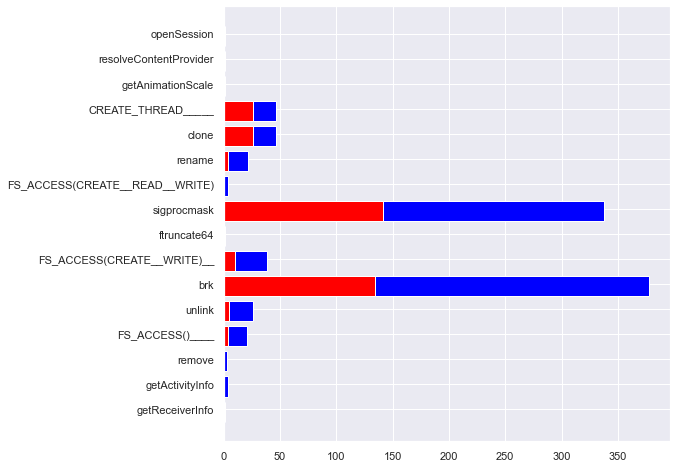

In [14]:
#confronto tra good e malware nelle feature più importanti
bar_width = 0.4
fig,ax = plt.subplots(figsize=(8, 8),sharey=True, sharex=True)
for i in range(0,16):
    index = np.arange(16)
    if(counter_good[i]<counter_malware[i]):
        ax.barh(bar_width*1.25*i,counter_malware[i],bar_width, color="red")
        ax.barh(bar_width*1.25*i,counter_good[i],bar_width, color="blue")
    else:
        ax.barh(bar_width*1.25*i,counter_good[i],bar_width, color="blue")
        ax.barh(bar_width*1.25*i,counter_malware[i],bar_width, color="red")
    
ax.set_yticks(index/2+(bar_width+0.1/2)-bar_width)
ax.set_yticklabels(features)
        
print(index)
plt.show()

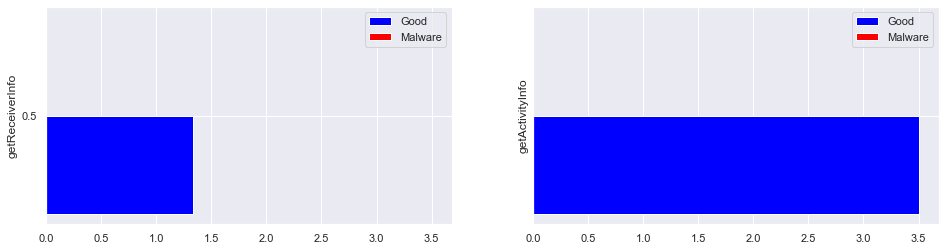

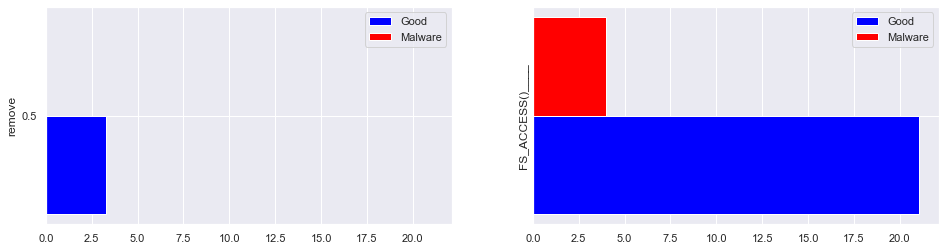

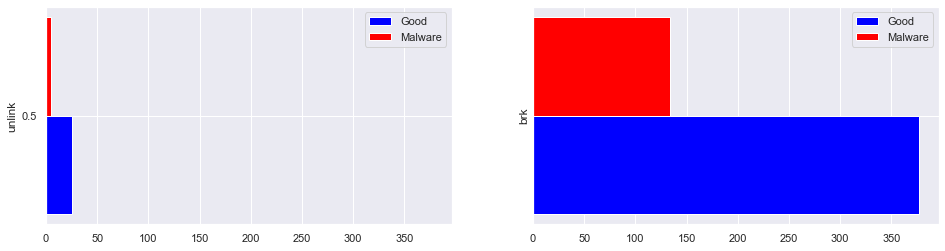

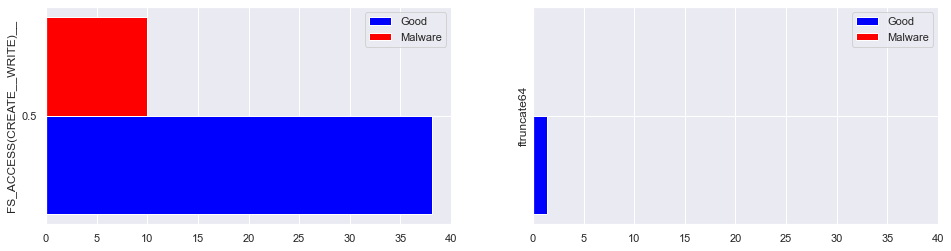

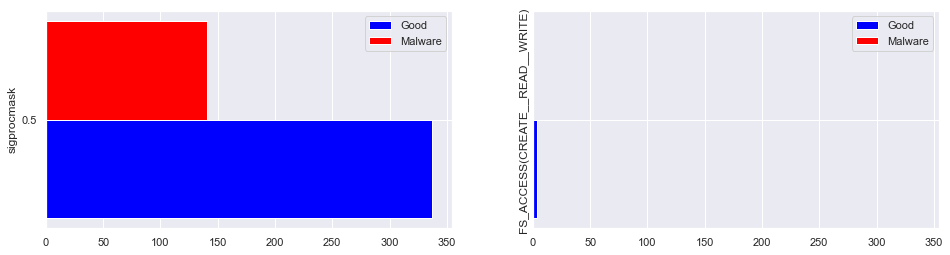

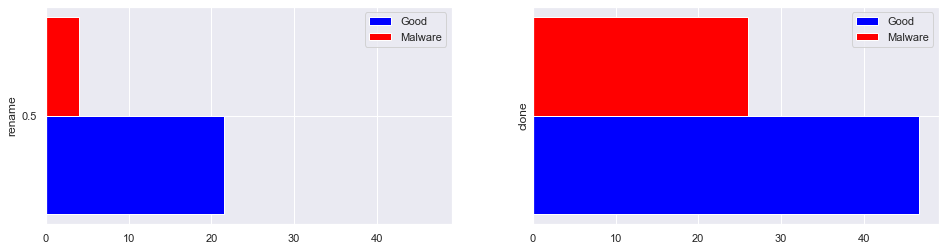

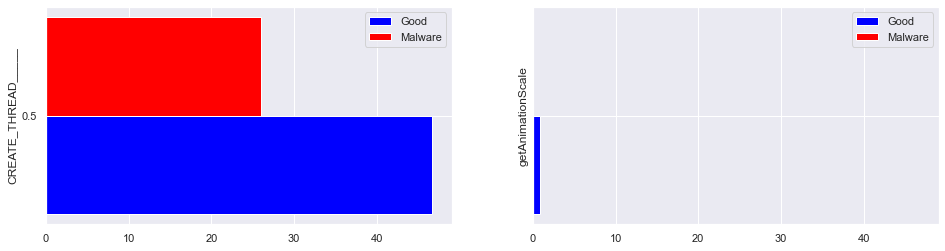

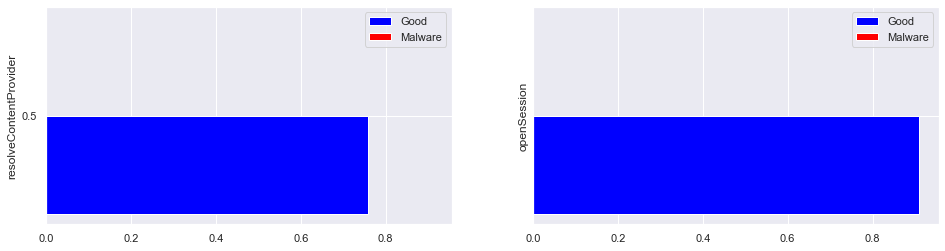

In [15]:
#confronto tra good e malware nelle feature più importanti singoli
bar_width = 1
i = 0;
while (i<16):
    index = np.arange(1)
    fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, sharex=True,figsize=(16, 4))
    good = ax1.barh(index, counter_good[i], bar_width,
                    label="Good",color="blue")

    malware = ax1.barh(index+bar_width, counter_malware[i],
                     bar_width, label="Malware", color = "red")
    ax1.set_yticks(index + bar_width / 2)
    ax1.set_ylabel(features[i])
    #ax.set_xscale('log')
    ax1.legend()
    
    i+=1;
    good = ax2.barh(index, counter_good[i], bar_width,
                    label="Good",color="blue")

    malware = ax2.barh(index+bar_width, counter_malware[i],
                     bar_width, label="Malware", color = "red")
    ax2.set_yticks(index + bar_width / 2)
    ax2.set_ylabel(features[i])
    #ax.set_xscale('log')
    ax2.legend()

    plt.show()
    i+=1;
